Vehicle safety is a critical concern for consumers, manufacturers, and regulators. The National Highway Traffic Safety Administration (NHTSA) conducts rigorous crash tests to evaluate how well vehicles protect occupants in collisions. These tests produce safety ratings (1-5 stars) that influence purchasing decisions and automotive design.


Key Motivations for This Project

-Consumer Safety Awareness
Many buyers rely on safety ratings when choosing a vehicle.
A predictive model can help consumers understand which safety features contribute most to high ratings.


-Automotive Industry Insights
Manufacturers can use this analysis to identify key safety improvements.
Understanding which crash test metrics most impact ratings can guide engineering decisions.


-Regulatory & Policy Implications
Governments and safety organizations can use ML models to assess trends in vehicle safety.
Helps identify gaps in safety standards and areas needing stricter regulations.


-Machine Learning Challenge
The dataset contains mixed data types (numerical, categorical, text) and missing values, making it a good case study for feature engineering and model selection.
Since safety ratings are ordinal (1-5 stars), this is a multiclass classification problem with real-world impact.


Business & Societal Impact

Consumers: Make better-informed decisions when purchasing vehicles.
Manufacturers: Optimize safety features to achieve higher ratings.
Regulators: Identify vehicles that may need stricter safety evaluations.


Why This Dataset?

Publicly available (NHTSA’s New Car Assessment Program).
Rich in features (128 variables including crash test results, safety systems, and vehicle specs).
Moderate size (~5,000+ rows filled with values of target variables otherwise 17000+ rows), suitable for ML modeling.
Not overused (unlike Titanic, Iris, or MNIST datasets).


Classification Goal

Predict OVERALL_STARS (1-5 stars) based on the information provided in the dataset

This project will help bridge the gap between raw crash test data and actionable safety insights—benefitting consumers, automakers, and policymakers alike.




In [1]:
import pandas as pd

# Loading the dataset Raw_Data
df = pd.read_csv("raw_data.csv", low_memory=False)

# Basic info of the dataset with dtype and name of the columns 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 128 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    MAKE                          object 
 1    MODEL                         object 
 2    MODEL_YR                      int64  
 3    BODY_STYLE                    object 
 4    VEHICLE_TYPE                  object 
 5    DRIVE_TRAIN                   object 
 6    PRODUCTION_RELEASE            int64  
 7    VEHICLE_CLASS                 object 
 8    BODY_FRAME                    object 
 9    NUM_OF_SEATING                object 
 10   SEAT_LOC                      object 
 11   SEAT_LOC_COMMENTS             object 
 12   MIN_GROSS_WEIGHT              float64
 13   MAX_GROSS_WEIGHT              float64
 14   UPPER_BELT_ANCHORAGE          object 
 15   UPPER_BELT_ANCHORAGE_LOC      object 
 16   SEAT_BELT_PRETENSIONER        object 
 17   SEAT_BELT_PRETENSIONER_LOC    object 
 18   LOAD

In [25]:
# Display first few rows to get an idea of the data

df.head()

,MAKE,MODEL,MODEL_YR,BODY_STYLE,VEHICLE_TYPE,DRIVE_TRAIN,PRODUCTION_RELEASE,VEHICLE_CLASS,BODY_FRAME,NUM_OF_SEATING,...,POLE_HIC_36_DRIV,PELVIC_FORCE,ROLLOVER_POSSIBILITY,STATIC_STABI_FACTOR,TIP,ROLL_SAFETY_CONCERN,ROLL_FOOT_NOTES,ROLLOVER_STARS,NHTSA_BACKUP_CAMERA,BACKUP_CAMERA
0,ACURA,ADX,2025,SUV,MPV,AWD,1,NaN,,5,...,NaN,NaN,0.000,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,ACURA,ADX,2025,SUV,MPV,FWD,1,NaN,,5,...,NaN,NaN,0.000,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,ACURA,INTEGRA,2025,5 HB,PC,FWD,1,NaN,,5,...,235.989,2871.970,0.095,1.48,No Tip,NaN,NaN,5.0,NaN,NaN
3,ACURA,INTEGRA TYPE-S,2025,5 HB,PC,FWD,1,NaN,,4,...,NaN,NaN,0.095,1.48,No Tip,NaN,NaN,5.0,NaN,NaN
4,ACURA,MDX,2025,SUV,MPV,AWD,1,NaN,,7,...,549.430,1886.689,0.151,NaN,No Tip,NaN,NaN,NaN,NaN,NaN


In [18]:
# some more information about the dataset : count by dtypes and finding the null values

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(f"Dataset shape - Rows, Columns : {df.shape}")
print("\nCount by Data types:")
print(df.dtypes.value_counts())

# Missing values analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing/len(df))*100
print("\nMissing values by percentage:")
print(missing_percent[missing_percent > 50])

Dataset shape - Rows, Columns : (11757, 128)

Count by Data types:
object     84
float64    42
int64       2
Name: count, dtype: int64

Missing values by percentage:
FRNT_SAFETY_CONCERN_DRIV    99.957472
FRNT_SAFETY_CONCERN_PASS    99.948967
POLE_SAFETY_CONCERN         99.829889
FRNT_FOOT_NOTES_PASS        99.821383
SIDE_SAFETY_CONCERN_DRIV    99.821383
                              ...    
FRNT_PASS_STARS             53.593604
POLE_VIN                    53.593604
FRNT_DRIV_STARS             53.568087
POLE_TEST_NO                53.346942
SIDE_POLE_STARS             53.287403
Length: 70, dtype: float64


In [14]:
# We will be working on a classification problem where the dataset will be used to predict the target variable 'OVERALL_STARS'. 
# Finding the null values for the target column

print(df['OVERALL_STARS'].isnull().sum())

6629


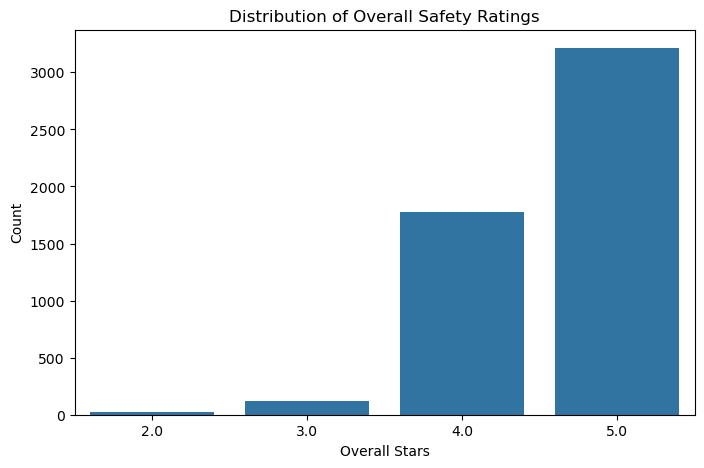

In [144]:
# Target variable distribution (looks unbalanced)

plt.figure(figsize=(8,5))
sns.countplot(x='OVERALL_STARS', data=df)
plt.title('Distribution of Overall Safety Ratings')
plt.xlabel('Overall Stars')
plt.ylabel('Count')
plt.show()


In [26]:
# droping the rows where Target values are null

df.dropna(subset=['OVERALL_STARS'], inplace=True)

In [28]:
# re-printing the shape of the dataframe

df.shape

(5128, 128)

In [44]:
# Checking other columns where null values are more than 50%

nulls_df = df.isnull().sum().sort_values(ascending=False).reset_index()

nulls_df.columns = ['Column', 'Null Count']

nulls_df_temp = nulls_df[nulls_df['Null Count'] > len(df) *.50]

print(list(nulls_df_temp['Column']))

print("\n",list(nulls_df_temp['Null Count']))

['FRNT_SAFETY_CONCERN_DRIV', 'FRNT_SAFETY_CONCERN_PASS', 'FRNT_FOOT_NOTES_PASS', 'SIDE_SAFETY_CONCERN_DRIV', 'POLE_SAFETY_CONCERN', 'ADAPTIVE_CRUISE_CONTROL', 'ROLL_FOOT_NOTES', 'ABS', 'SIDE_SAFETY_CONCERN_PASS', 'ADL', 'BETI', 'ROLL_SAFETY_CONCERN', 'FRNT_FOOT_NOTES', 'SIDE_FOOT_NOTES_PASS', 'POLE_FOOT_NOTES', 'NHTSA_BACKUP_CAMERA', 'SIDE_FOOT_NOTES', 'REAR_BELT_INDICATOR', 'NHTSA_LDW_EVALUATION', 'NHTSA_DBS_EVALUATION', 'NHTSA_CIB_EVALUATION', 'NHTSA_FCW_EVALUATION', 'DYNAMIC_HEAD_RESTRAINT_IND', 'NHTSA_ESC', 'BACKUP_CAMERA', 'SEAT_LOC_COMMENTS', 'PELVIS_SAB_TYPE', 'PELVIS_SAB_LOC']

 [5123, 5122, 5112, 5109, 5108, 5094, 5067, 5062, 5031, 4964, 4952, 4944, 4902, 4746, 4731, 4672, 4611, 4453, 4130, 4124, 4124, 4119, 3992, 3976, 3751, 3444, 2856, 2825]


In [148]:
# Columns to drop
drop_cols = [
    # High missing values
    'FRNT_SAFETY_CONCERN_DRIV', 'FRNT_SAFETY_CONCERN_PASS', 'FRNT_FOOT_NOTES_PASS', 'SIDE_SAFETY_CONCERN_DRIV',
    'POLE_SAFETY_CONCERN', 'ADAPTIVE_CRUISE_CONTROL', 'ROLL_FOOT_NOTES', 'ABS', 'SIDE_SAFETY_CONCERN_PASS', 'ADL',
    'BETI', 'ROLL_SAFETY_CONCERN', 'FRNT_FOOT_NOTES', 'SIDE_FOOT_NOTES_PASS', 'POLE_FOOT_NOTES', 'NHTSA_BACKUP_CAMERA', 
    'SIDE_FOOT_NOTES', 'REAR_BELT_INDICATOR', 'NHTSA_LDW_EVALUATION', 'NHTSA_DBS_EVALUATION', 'NHTSA_CIB_EVALUATION', 
    'NHTSA_FCW_EVALUATION', 'DYNAMIC_HEAD_RESTRAINT_IND', 'NHTSA_ESC', 'BACKUP_CAMERA', 'SEAT_LOC_COMMENTS', 
    'PELVIS_SAB_TYPE', 'PELVIS_SAB_LOC',

    
    # Identifiers which are irrelevant 
    'FRNT_VIN', 'SIDE_VIN', 'POLE_VIN',
    'FRNT_TEST_NO', 'SIDE_TEST_NO', 'POLE_TEST_NO',

    
    # Redundant safety rating columns
    
    'FRNT_DRIV_STARS', 'FRNT_PASS_STARS', 'OVERALL_FRNT_STARS',
    'SIDE_DRIV_STARS', 'SIDE_PASS_STARS', 'SIDE_BARRIER_STAR',
    'COMB_FRNT_STAR', 'COMB_REAR_STAR', 'OVERALL_SIDE_STARS',
    'SIDE_POLE_STARS', 'ROLLOVER_STARS'

]

# Droping the above columns
df_clean = df.drop(columns=drop_cols)

In [152]:
# Defining the numerical and categorical variables

numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", numerical_cols,'\n')
print("Categorical features:", categorical_cols)


Numerical features: ['MODEL_YR', 'PRODUCTION_RELEASE', 'MIN_GROSS_WEIGHT', 'MAX_GROSS_WEIGHT', 'OVERALL_STARS', 'CURB_WEIGHT', 'HIC15_DRIV', 'CHEST_DEFL_DRIV', 'LEFT_FEMUR_DRIV', 'RIGHT_FEMUR_DRIV', 'NIJ_DRIV', 'NECK_TENS_DRIV', 'NET_COMP_DRIV', 'HIC15_PASS', 'CHEST_DEFL_PASS', 'LEFT_FEMUR_PASS', 'RIGHT_FEMUR_PASS', 'NIJ_PASS', 'NECK_TENS_PASS', 'NET_COMP_PASS', 'SIDE_HIC_36_DRIV', 'RIB_DEFLECTION_DRIV', 'ABDOMEN_FORCE_DRIV', 'SYMPHYSIS_FORCE_DRIV', 'SIDE_HIC_36_PASS', 'PELVIC_FORCE_PASS', 'POLE_HIC_36_DRIV', 'PELVIC_FORCE', 'ROLLOVER_POSSIBILITY', 'STATIC_STABI_FACTOR'] 

Categorical features: ['MAKE', 'MODEL', 'BODY_STYLE', 'VEHICLE_TYPE', 'DRIVE_TRAIN', 'VEHICLE_CLASS', 'BODY_FRAME', 'NUM_OF_SEATING', 'SEAT_LOC', 'UPPER_BELT_ANCHORAGE', 'UPPER_BELT_ANCHORAGE_LOC', 'SEAT_BELT_PRETENSIONER', 'SEAT_BELT_PRETENSIONER_LOC', 'LOAD_LIMITERS', 'LOAD_LIMITERS_LOC', 'FRNT_BELT_INDICATOR', 'FRNT_BELT_LOC', 'LATCH_REAR_POSITION', 'HEAD_SAB', 'HEAD_SAB_TYPE', 'HEAD_SAB_LOC', 'HEAD_SAB_MOUNT_LOC'

In [160]:
# Numerical variables decription

df_clean[numerical_cols].describe()


,MODEL_YR,PRODUCTION_RELEASE,MIN_GROSS_WEIGHT,MAX_GROSS_WEIGHT,OVERALL_STARS,CURB_WEIGHT,HIC15_DRIV,CHEST_DEFL_DRIV,LEFT_FEMUR_DRIV,RIGHT_FEMUR_DRIV,...,SIDE_HIC_36_DRIV,RIB_DEFLECTION_DRIV,ABDOMEN_FORCE_DRIV,SYMPHYSIS_FORCE_DRIV,SIDE_HIC_36_PASS,PELVIC_FORCE_PASS,POLE_HIC_36_DRIV,PELVIC_FORCE,ROLLOVER_POSSIBILITY,STATIC_STABI_FACTOR
count,5128.000000,5128.000000,4722.000000,4726.000000,5128.000000,5090.000000,4638.000000,4638.000000,4638.000000,4638.000000,...,4634.000000,4634.000000,4634.000000,4634.000000,4499.000000,4499.000000,4634.000000,4634.000000,5128.000000,5111.000000
mean,2018.335218,1.019111,5421.688098,5715.562040,4.593799,4063.561690,215.606786,23.466312,1542.346569,1810.105135,...,98.247847,21.640574,723.619785,1406.104085,193.973539,2555.810847,351.457948,3213.319904,0.153087,1.296787
std,4.099236,0.139748,1346.445583,1484.370843,0.562962,1175.611467,88.433618,4.776524,1046.602656,994.751524,...,64.512826,7.044225,283.008382,520.974040,132.826546,1055.438023,712.224111,800.570261,0.059683,0.135720
min,2011.000000,1.000000,7.000000,505.000000,2.000000,0.000000,67.312000,9.493000,48.207000,56.017000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,1.000000,4475.000000,4680.000000,4.000000,3414.000000,151.557000,20.210000,727.703000,1160.696000,...,51.997000,16.609000,504.102000,1035.229000,92.723000,1788.800000,237.749000,2639.706000,0.107000,1.200000
50%,2018.000000,1.000000,5100.000000,5401.000000,5.000000,3982.000000,200.127000,22.994000,1414.992000,1719.957000,...,82.777000,21.482000,692.371000,1366.163000,162.245000,2542.742000,293.138500,3144.957000,0.155000,1.260000
75%,2022.000000,1.000000,6168.000000,6459.000000,5.000000,4671.250000,257.128000,26.298000,2137.459000,2347.276000,...,134.545000,26.131000,872.914250,1688.813000,271.656000,3286.273000,364.533000,3699.114000,0.185000,1.410000
max,2025.000000,3.000000,9900.000000,11000.000000,5.000000,7586.000000,821.865000,46.786000,5927.830000,6801.413000,...,387.926000,52.008000,2234.137000,3969.616000,819.636000,6357.052000,12246.016000,7430.367000,1.330000,1.920000


In [158]:
# Categorical variables description 
for col in categorical_cols[:5]:  # Only first 5 for brevity
    print(df_clean[col].value_counts().head(5))


MAKE
FORD         552
CHEVROLET    471
TOYOTA       449
GMC          337
NISSAN       253
Name: count, dtype: int64
MODEL
SILVERADO 1500    85
SIERRA 1500       85
TUNDRA            60
1500              48
SIERRA 2500       46
Name: count, dtype: int64
BODY_STYLE
SUV      2260
4 DR     1291
PU/CC     424
5 HB      280
PU/EC     232
Name: count, dtype: int64
VEHICLE_TYPE
MPV      2390
PC       1862
TRUCK     869
VAN         6
            1
Name: count, dtype: int64
DRIVE_TRAIN
FWD    1824
AWD    1591
RWD     726
4WD     591
2WD     226
Name: count, dtype: int64


OVERALL_STARS           1.000000
STATIC_STABI_FACTOR     0.445106
MODEL_YR                0.289331
SIDE_HIC_36_DRIV        0.197973
SIDE_HIC_36_PASS        0.047858
ABDOMEN_FORCE_DRIV      0.036251
PELVIC_FORCE_PASS      -0.022819
PRODUCTION_RELEASE     -0.047582
SYMPHYSIS_FORCE_DRIV   -0.104878
RIB_DEFLECTION_DRIV    -0.125360
Name: OVERALL_STARS, dtype: float64


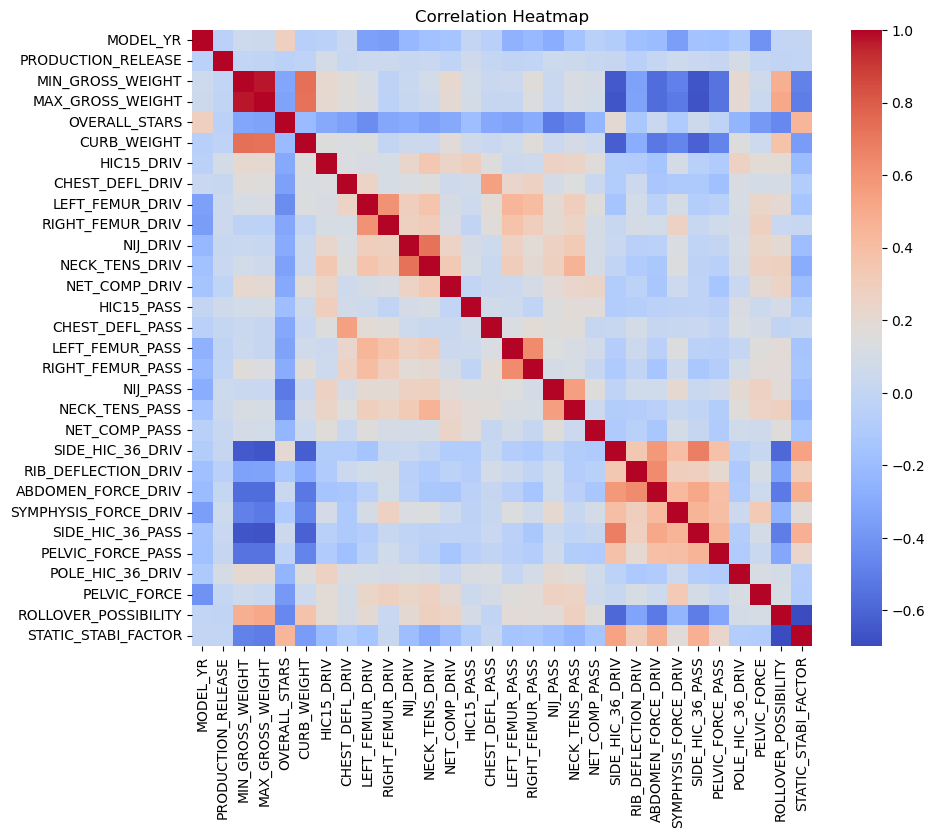

In [162]:
# correlation matrix 

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df_clean[numerical_cols].corr()

# Get correlation of each feature with OVERALL_STARS
top_corr = corr_matrix['OVERALL_STARS'].sort_values(ascending=False)
print(top_corr.head(10))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


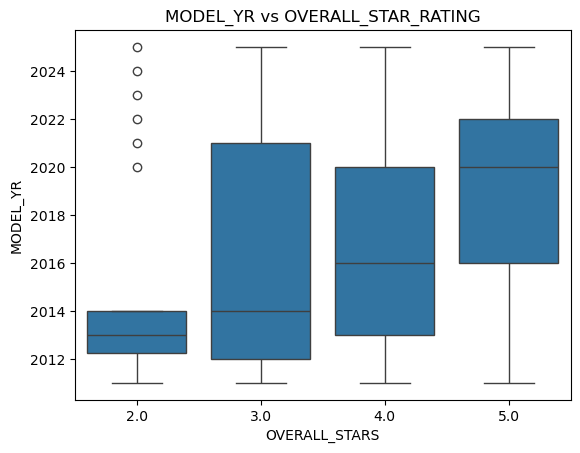

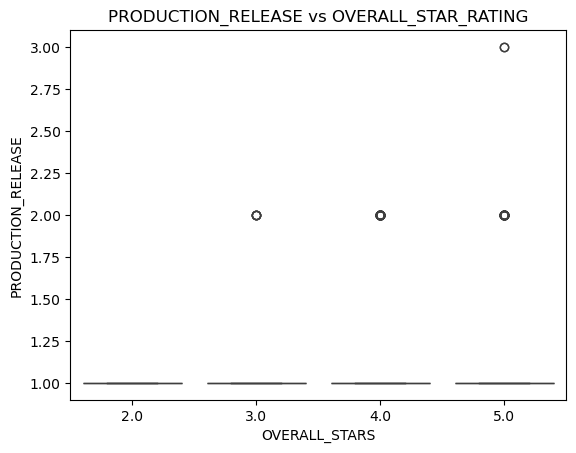

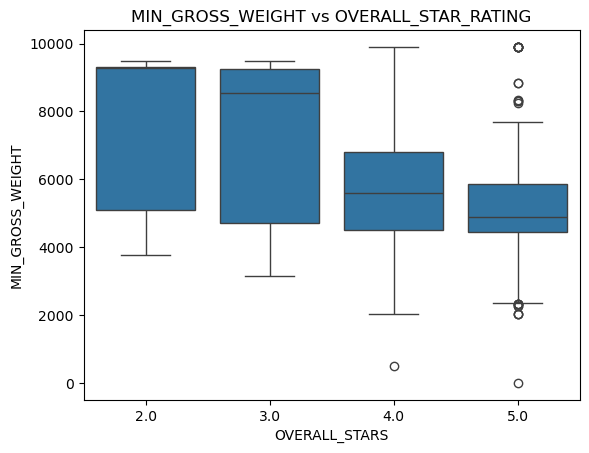

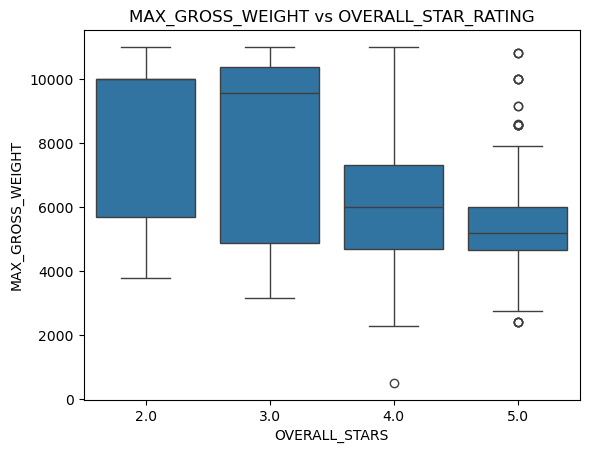

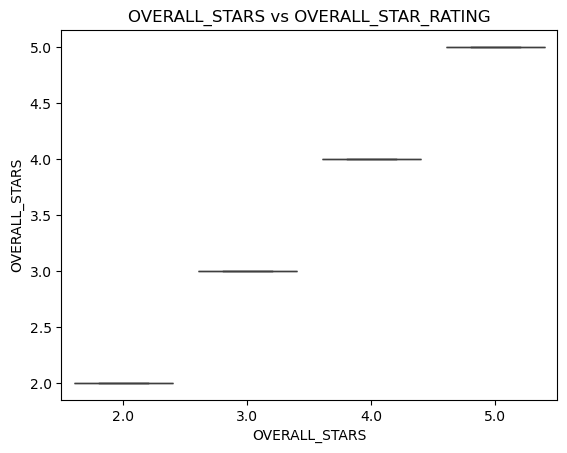

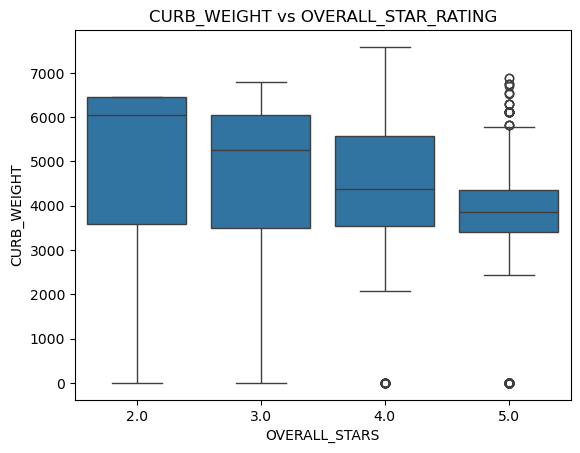

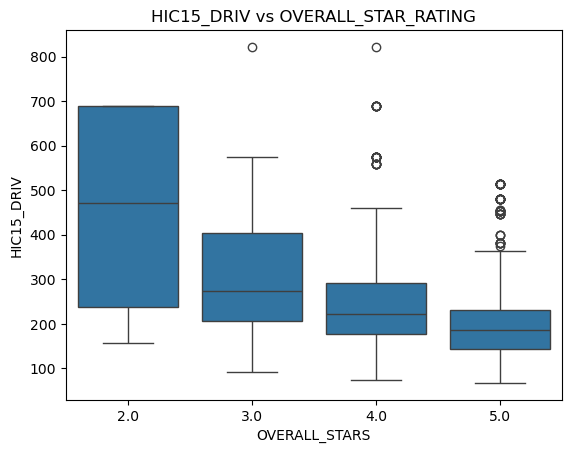

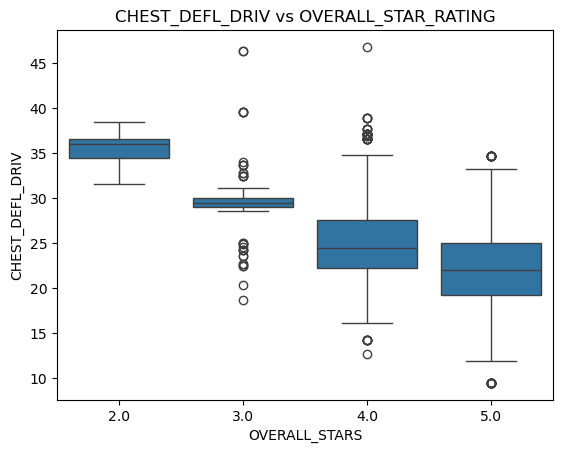

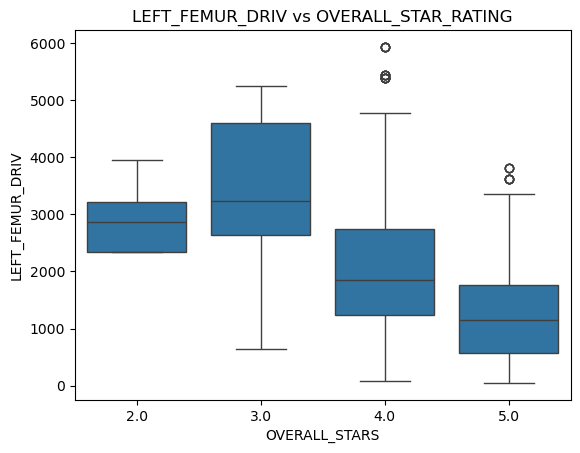

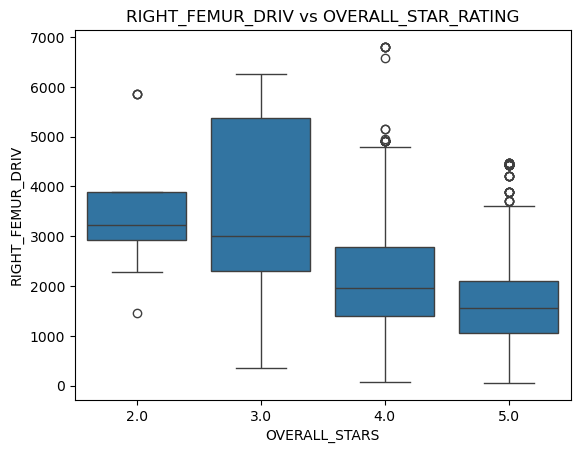

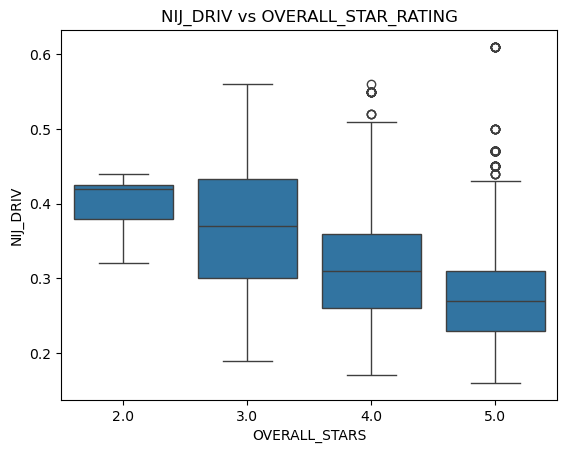

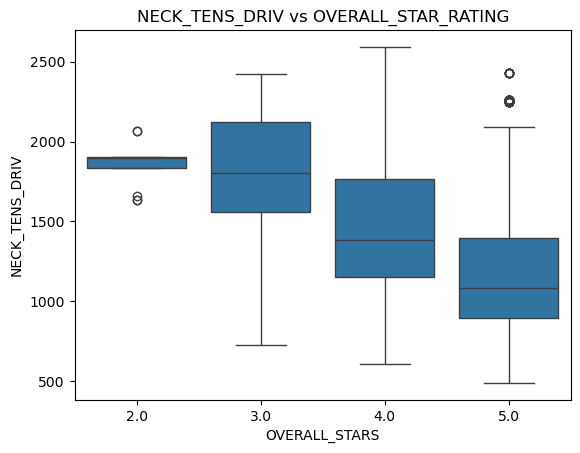

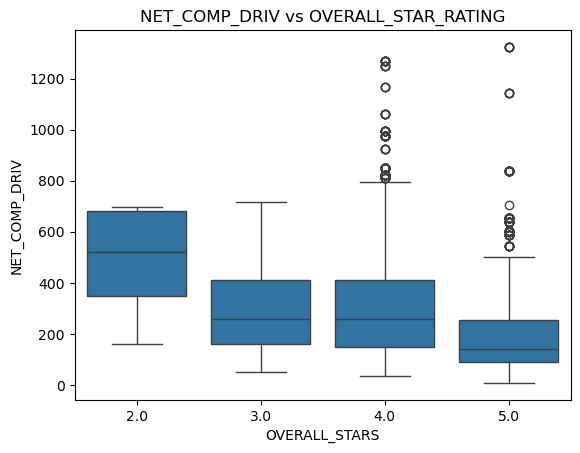

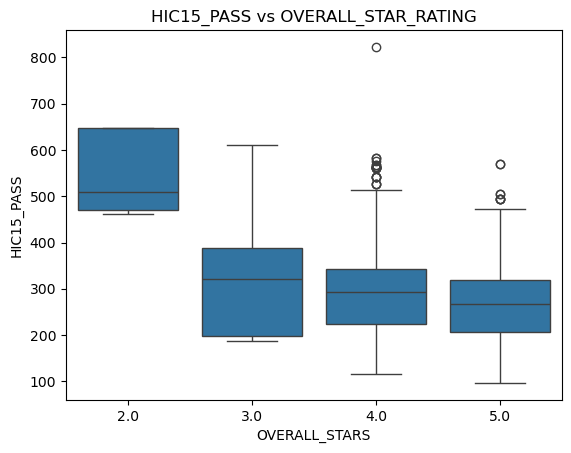

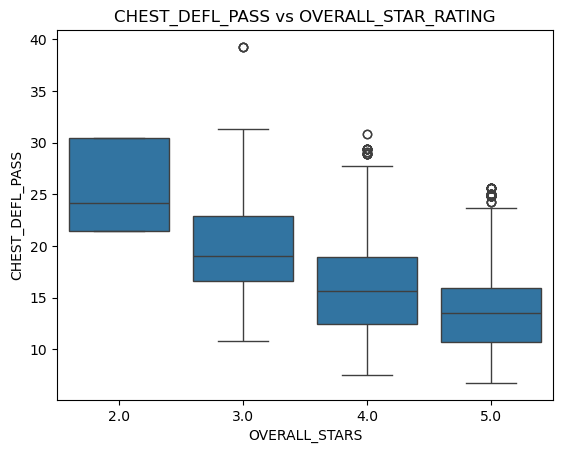

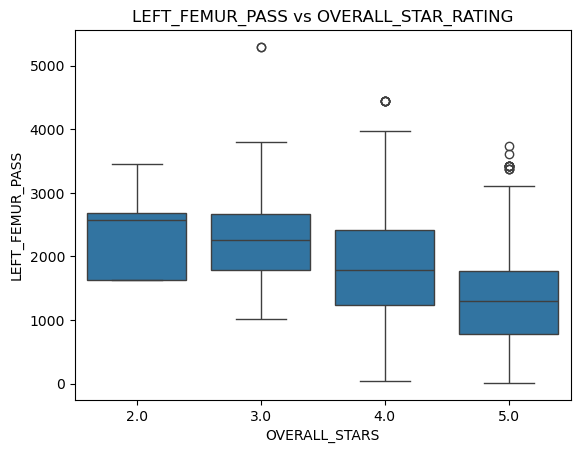

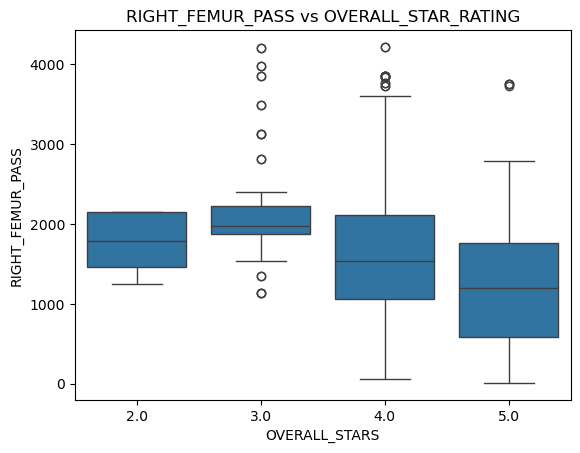

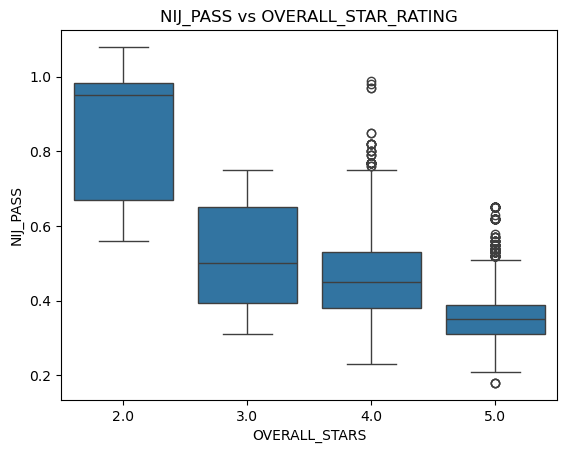

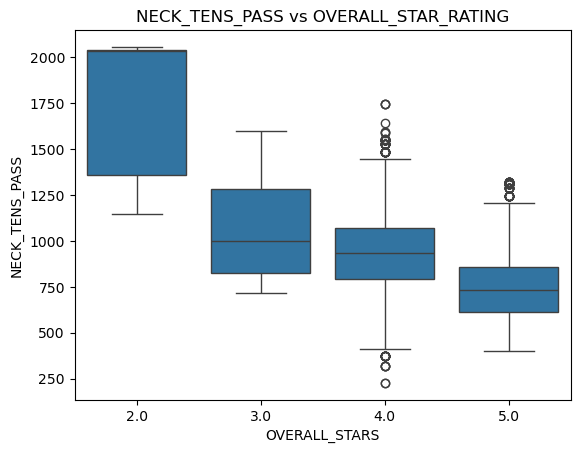

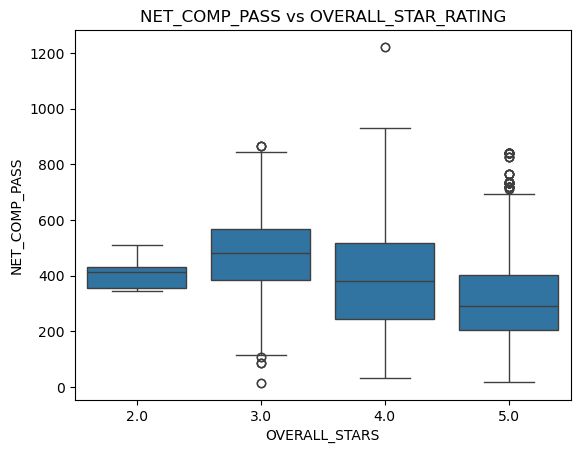

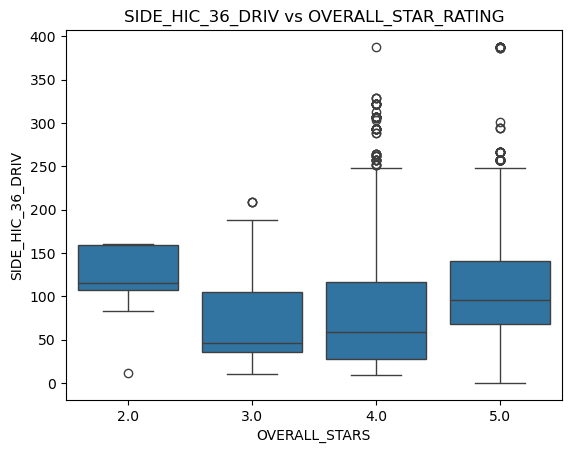

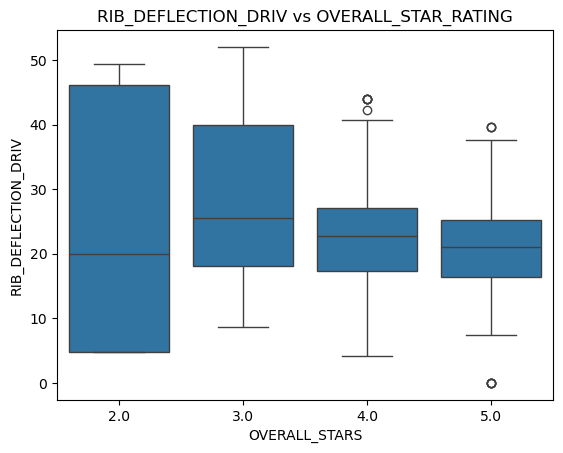

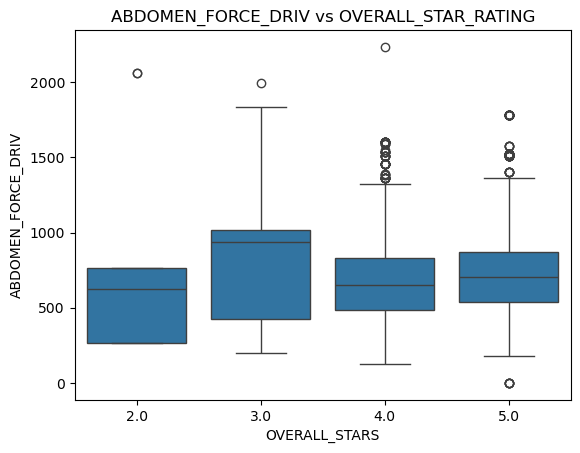

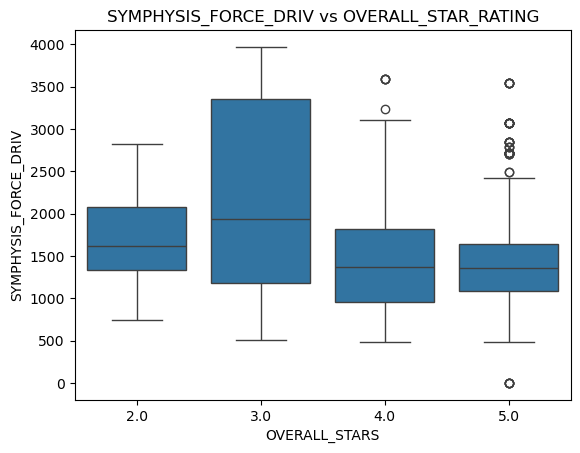

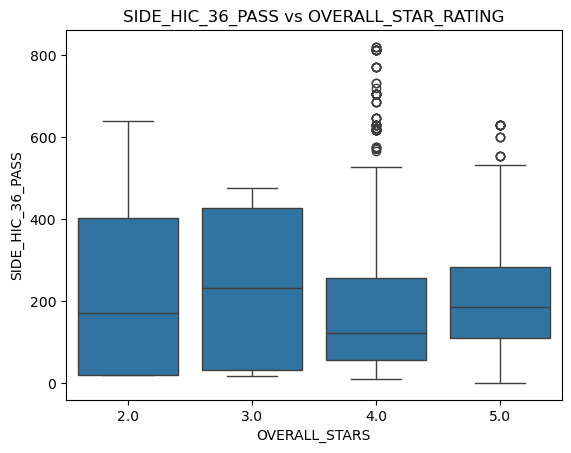

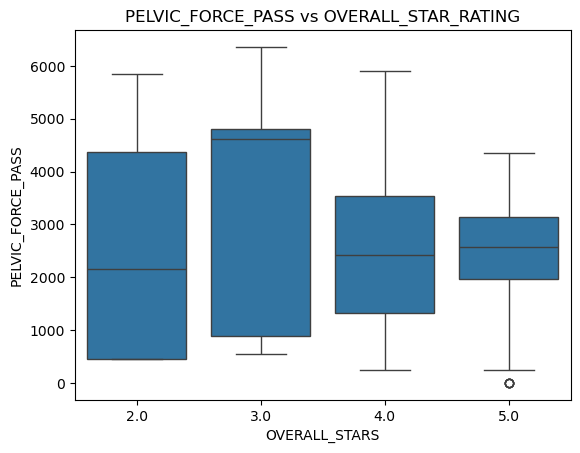

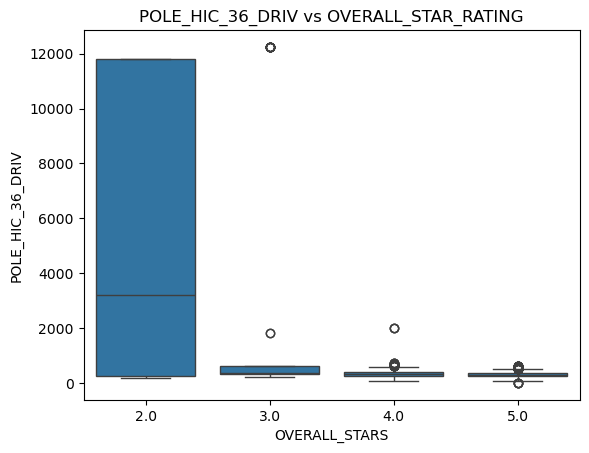

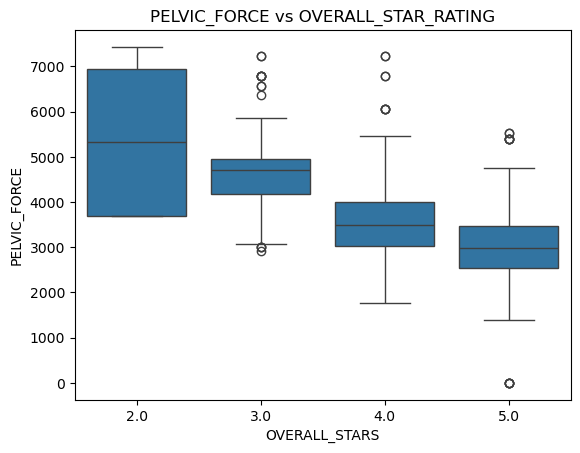

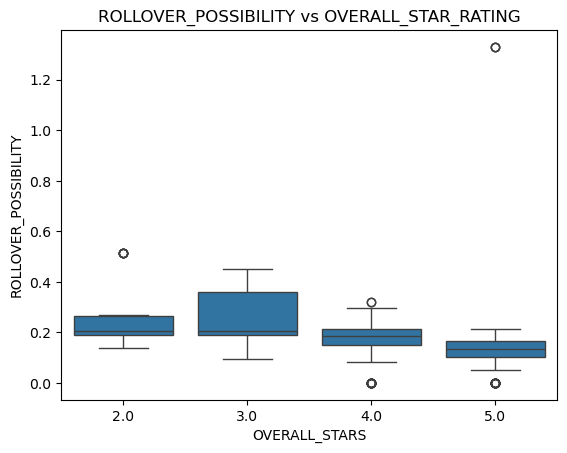

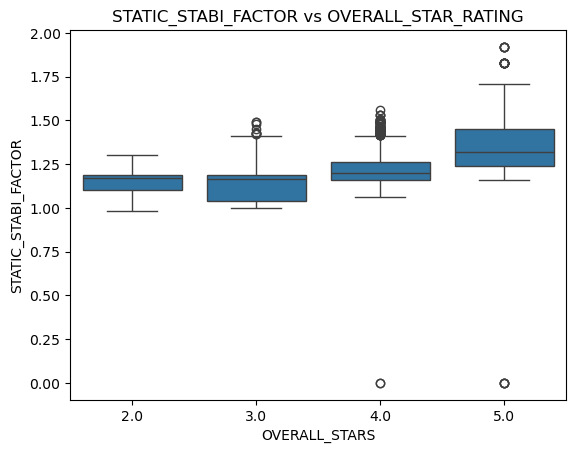

In [164]:
# Boxplot example: numerical vs. target (outliers can be detected here)
for col in numerical_cols:
    sns.boxplot(x='OVERALL_STARS', y=col, data=df_clean)
    plt.title(f'{col} vs OVERALL_STAR_RATING')
    plt.show()


In [168]:
df_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5128 entries, 2 to 11752
Data columns (total 83 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MAKE                          5128 non-null   object 
 1   MODEL                         5128 non-null   object 
 2   MODEL_YR                      5128 non-null   int64  
 3   BODY_STYLE                    5128 non-null   object 
 4   VEHICLE_TYPE                  5128 non-null   object 
 5   DRIVE_TRAIN                   5128 non-null   object 
 6   PRODUCTION_RELEASE            5128 non-null   int64  
 7   VEHICLE_CLASS                 2928 non-null   object 
 8   BODY_FRAME                    5127 non-null   object 
 9   NUM_OF_SEATING                5127 non-null   object 
 10  SEAT_LOC                      5127 non-null   object 
 11  MIN_GROSS_WEIGHT              4722 non-null   float64
 12  MAX_GROSS_WEIGHT              4726 non-null   float64
 13  UPPER_B

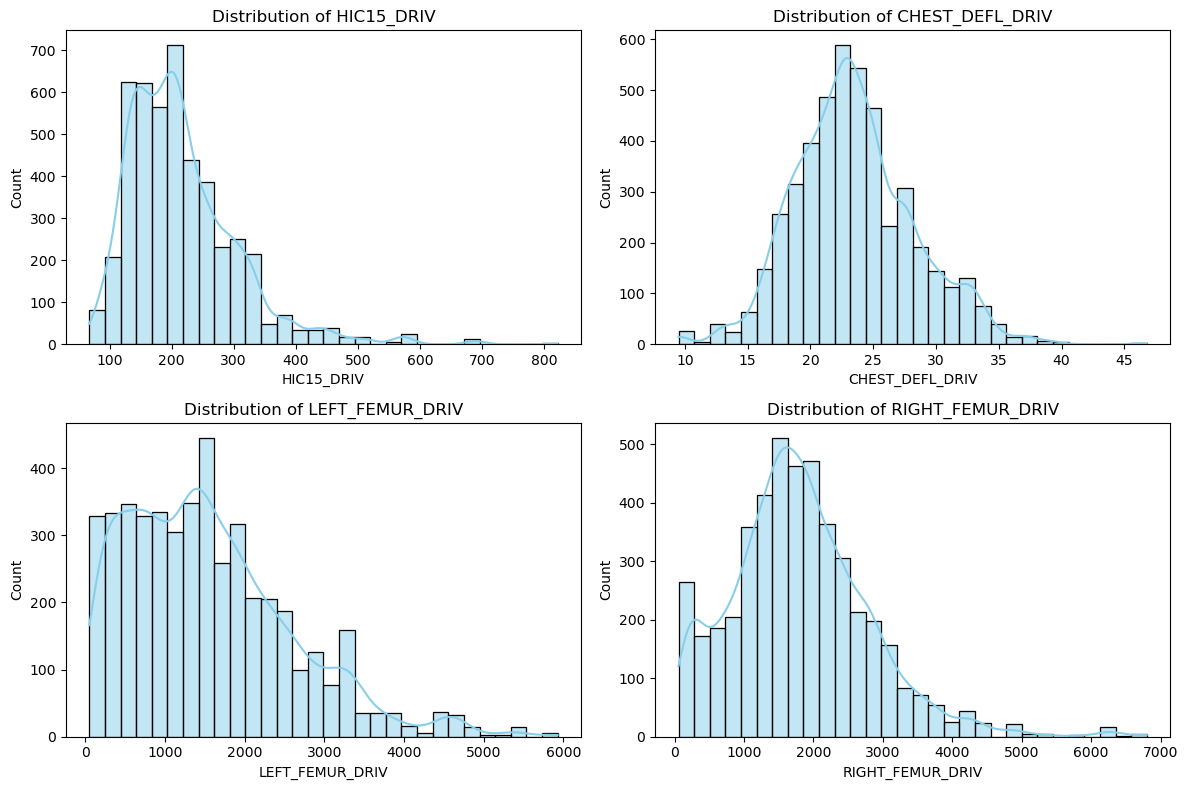

In [190]:
#Distribution of Crash Test Metrics

crash_test_metrics = ['HIC15_DRIV', 'CHEST_DEFL_DRIV', 'LEFT_FEMUR_DRIV', 'RIGHT_FEMUR_DRIV']
plt.figure(figsize=(12, 8))
for i, col in enumerate(crash_test_metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

HIC15_DRIV (Head Injury Criterion): Most vehicles score below 500 (lower is better).
Chest Deflection: Majority fall between 20-30 mm (lower = safer).
Femur Loads: Most vehicles keep forces below 2000 lbs (lower = safer).

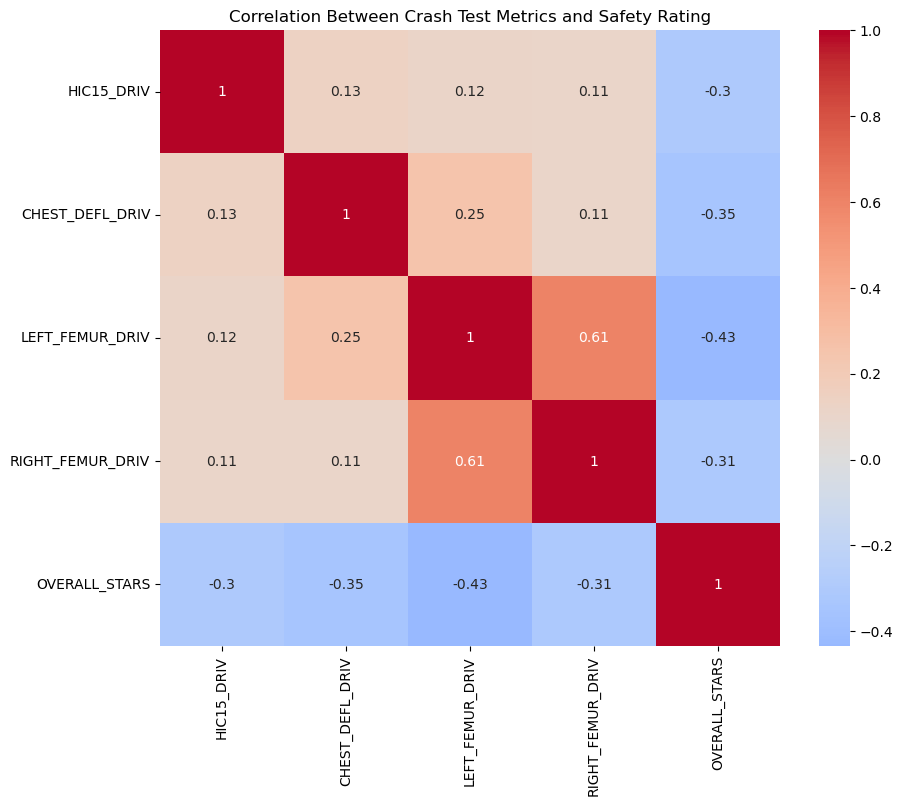

In [184]:
# Correlation Heatmap (Key Crash Test Metrics)

corr_matrix = df_clean[['HIC15_DRIV', 'CHEST_DEFL_DRIV', 'LEFT_FEMUR_DRIV', 'RIGHT_FEMUR_DRIV', 'OVERALL_STARS']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Crash Test Metrics and Safety Rating')
plt.show()

Negative correlation between crash test metrics (HIC15_DRIV, CHEST_DEFL_DRIV) and OVERALL_STARS (higher injury metrics → lower safety rating).
Femur loads show weaker correlation, suggesting other factors (e.g., airbags) may mitigate injury risk.

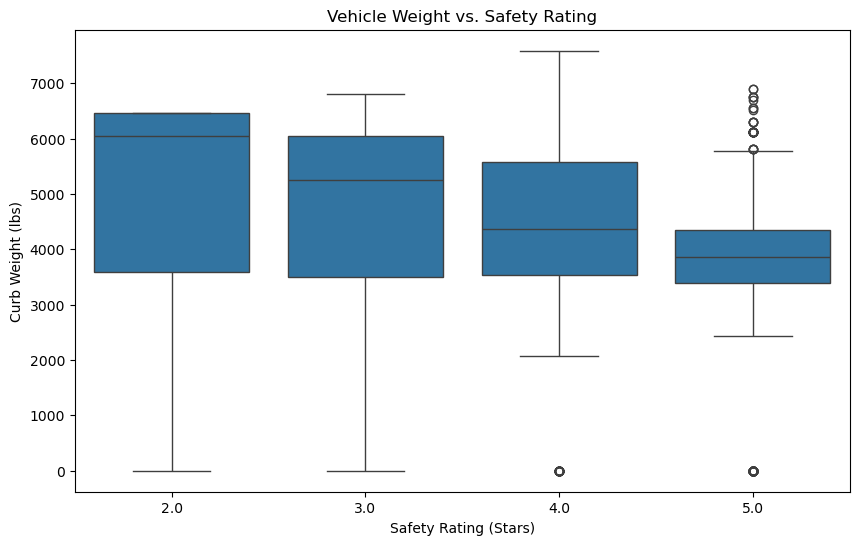

In [188]:
# Vehicle Weight vs. Safety Rating

plt.figure(figsize=(10, 6))
sns.boxplot(x='OVERALL_STARS', y='CURB_WEIGHT', data=df_clean)
plt.title('Vehicle Weight vs. Safety Rating')
plt.xlabel('Safety Rating (Stars)')
plt.ylabel('Curb Weight (lbs)')
plt.show()

Heavier vehicles (SUVs, trucks) tend to have higher safety ratings (4-5 stars).
Lighter vehicles (sedans, compacts) show more variability in ratings.

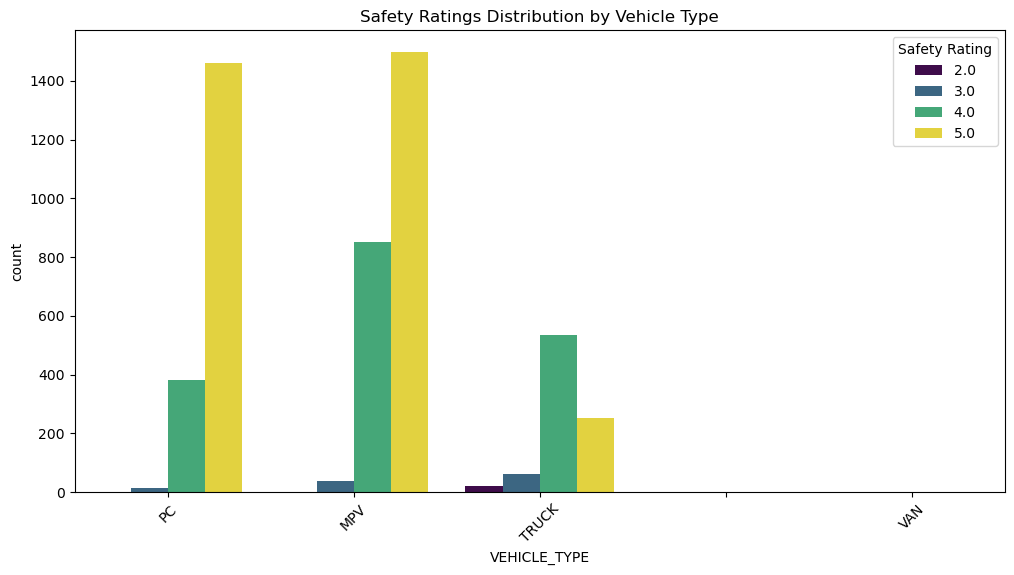

In [206]:
#Safety Ratings by Vehicle Type

plt.figure(figsize=(12, 6))
sns.countplot(x='VEHICLE_TYPE', hue='OVERALL_STARS', data=df_clean, palette='viridis')
plt.title('Safety Ratings Distribution by Vehicle Type')
plt.xticks(rotation=45)
plt.legend(title='Safety Rating')
plt.show()

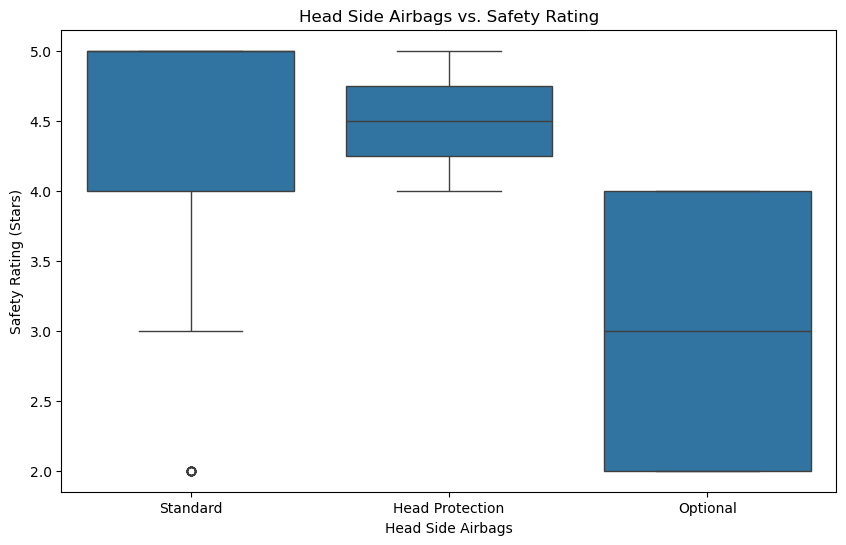

In [208]:
#Impact of Airbags on Safety Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='HEAD_SAB', y='OVERALL_STARS', data=df_clean)
plt.title('Head Side Airbags vs. Safety Rating')
plt.xlabel('Head Side Airbags')
plt.ylabel('Safety Rating (Stars)')
plt.show()


Vehicles with Standard air bags have variation but mostly falls under 4-5 stars
Head protection airbags mostly are more safer.

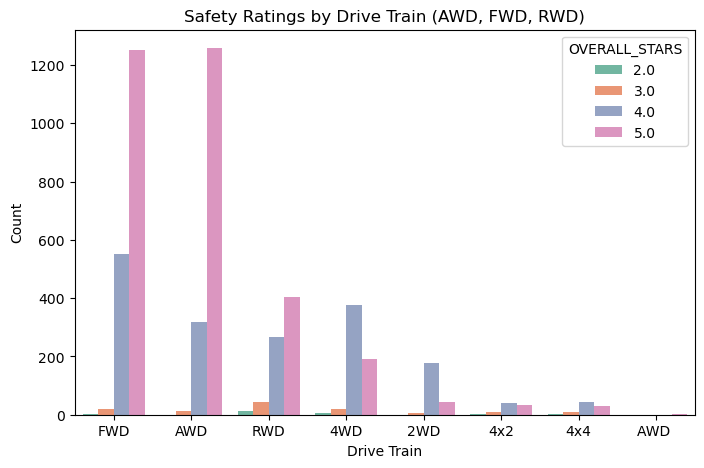

In [221]:
#Safety Ratings by Drive Train

plt.figure(figsize=(8, 5))
sns.countplot(x='DRIVE_TRAIN', hue='OVERALL_STARS', data=df_clean, palette='Set2')
plt.title('Safety Ratings by Drive Train (AWD, FWD, RWD)')
plt.xlabel('Drive Train')
plt.ylabel('Count')
plt.show()

AWD (All-Wheel Drive) and FWD (Front-Wheel Drive) vehicles have the highest proportion of 5-star ratings.

RWD (Rear-Wheel Drive) show more variability.

Other drive trains have less 5-star ratings